# <center>Car Price Prediction

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/used-cars-price-prediction/test-data.csv
/kaggle/input/used-cars-price-prediction/train-data.csv


# Data Overview

In [2]:
df = pd.read_csv('/kaggle/input/used-cars-price-prediction/train-data.csv')
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
              Data type for Mileage , Engine and Power columns need to be fixed.
    they should be float not object.this could be achieved by removing the units (kmpl , cc , bhp).
</p>
</div>

# Data Cleaning

In [4]:
round((df.isna().sum()/len(df))*100,2)

Unnamed: 0            0.00
Name                  0.00
Location              0.00
Year                  0.00
Kilometers_Driven     0.00
Fuel_Type             0.00
Transmission          0.00
Owner_Type            0.00
Mileage               0.03
Engine                0.60
Power                 0.60
Seats                 0.70
New_Price            86.31
Price                 0.00
dtype: float64

In [5]:
df.drop(columns = ['Unnamed: 0','New_Price'],inplace = True)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px; color:white;">
              New_Price column need to be dropped. missing values in other columns can be imputed. 
</p>
</div>

In [6]:
df.duplicated().sum()

0

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
 No duplicates. Now let's fix data types for Mileage , Engine and power columns.
    
</p>
</div>

In [7]:
df['Mileage'] = df['Mileage'].str.split(expand=True)[0].astype(float)
df['Engine'] = df['Engine'].str.split(expand=True)[0].astype(float)

In [8]:
(df['Power'] == 'null bhp').sum()

107

In [9]:
df['Power'] = df['Power'].replace('null bhp',None)
df['Power'] = df['Power'].str.split(expand=True)[0].astype(float)

In [10]:
df.sample()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
3401,Honda City i VTEC SV,Kolkata,2014,49000,Petrol,Manual,First,17.4,1497.0,117.3,5.0,4.75


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Now the Data is ready for exploration.
              
</p>
</div>

In [11]:
df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6019.000000,6.019000e+03,6017.000000,5983.000000,5983.000000,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,18.134961,1621.276450,113.200628,5.278735,9.479468
std,3.269742,9.126884e+04,4.582289,601.355233,53.756509,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,0.000000,0.440000
25%,2011.000000,3.400000e+04,15.170000,1198.000000,75.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.150000,1493.000000,97.600000,5.000000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1984.000000,138.100000,5.000000,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
    Kilometers_Driven ,Power ,Engine ,Price: these columns have outliers. we will remove outliers while performing univariate analysis.
    <br>
    Mileage and Seats: these columns have zeros in some rows. 
    
    

</p>
</div>

In [12]:
df.select_dtypes('object').describe()

,Name,Location,Fuel_Type,Transmission,Owner_Type
count,6019,6019,6019,6019,6019
unique,1876,11,5,2,4
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First
freq,49,790,3205,4299,4929


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Name column has high cardinality. we won't drop it so we can extract car model or Company from it.<br>
<br>If a column has high cardinality, it may be challenging to analyze the data in its current form. However, dropping the column altogether may lead to loss of important information. Instead, it may be useful to extract relevant information from the column, such as car model or brand, which can be used for further analysis.
</p>
</div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Now let's Remove Outliers   </p>
</div>

In [13]:
for col in ['Engine','Power','Kilometers_Driven','Mileage','Price']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 2.5*IQR
    upper_bound = Q3 + 2.5*IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Feature Engineering

In [14]:
df['Name'].nunique()

1660

In [15]:
df['Company'] = df['Name'].str.split(expand=True)[0].str.lower()
df['Model'] = df['Name'].str.split().str[0:2].str.join(' ').str.lower()
df.drop(columns = ['Name'],inplace = True)

In [16]:
df['Company'].nunique() , df['Model'].nunique()

(26, 185)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Now we have a new feature and we can use it in training our model.
</p>
</div>

# Univariate Analysis

In [17]:
# this function make the data fall in certain range.
def remove_outliers(df,col,lower,upper):
    df = df[ (df[col]>lower) & (df[col]<upper) ]
    return df

In [18]:
# this function plots histogram and boxplot for col parameter
def plot_num(df,col):
    fig ,ax = plt.subplots(1,2,figsize=(16,4))
    sns.histplot(df,x=col,kde=True,ax=ax[0])
    sns.boxplot(df,x=col,ax=ax[1])
    ax[0].set_title(f'Distribution of {col}')
    ax[1].set_title(f'{col} Boxplot')
    fig.show();

<h3>1. Year

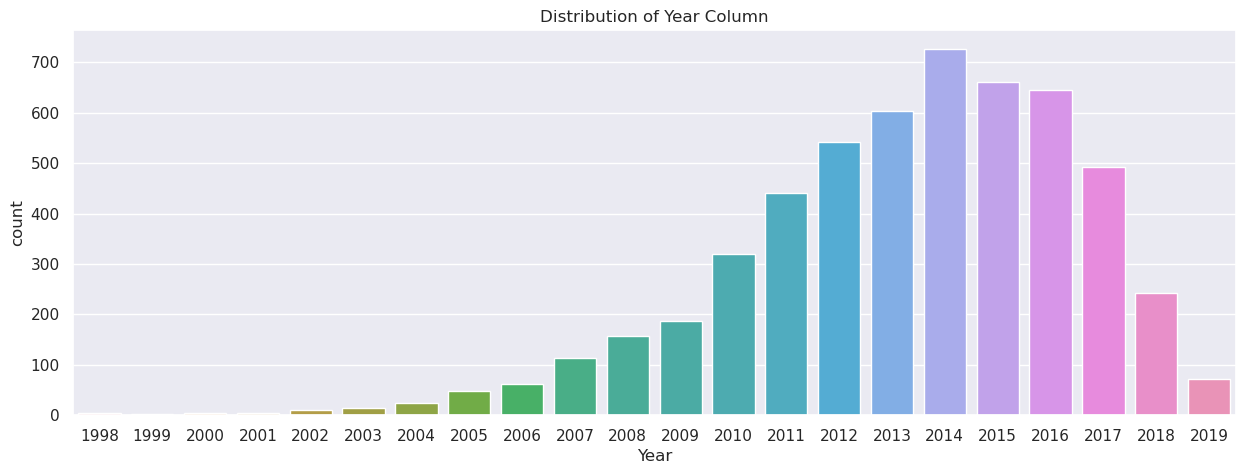

In [19]:
plt.figure(figsize=(15,5))
sns.countplot(df,x='Year');
plt.title('Distribution of Year Column');

<h3>2. Kilometers Driven

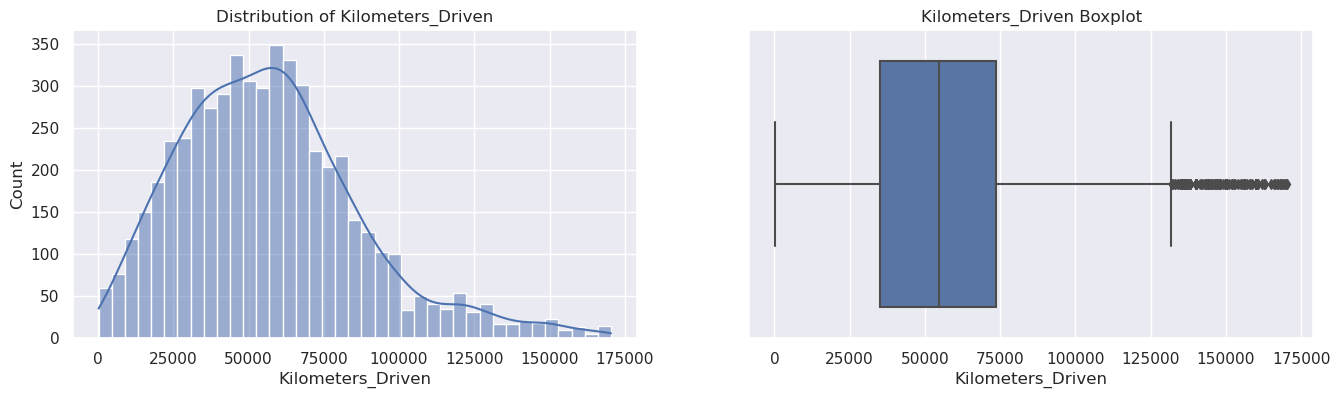

In [20]:
plot_num(df,'Kilometers_Driven')

<h3>3. Fuel Type

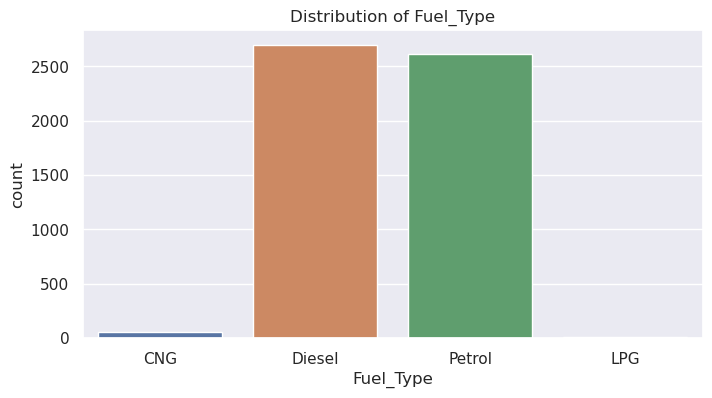

In [21]:
plt.figure(figsize=(8,4))
sns.countplot(df,x='Fuel_Type');
plt.title('Distribution of Fuel_Type');

In [22]:
df['Fuel_Type'].value_counts()

Diesel    2698
Petrol    2611
CNG         56
LPG         10
Name: Fuel_Type, dtype: int64

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
To prevent modeling issues, it may be advisable to exclude Fuel_Types with low frequency from the dataset.    
</p>
</div>

In [23]:
df = df[~df['Fuel_Type'].isin(['LPG','Electric'])]

<h3>4. Transmission

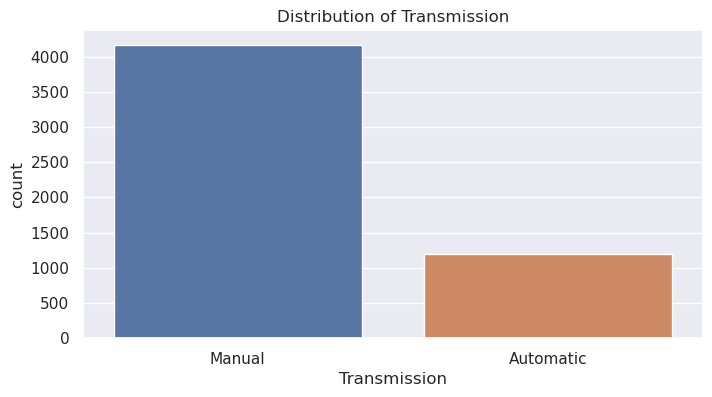

In [24]:
plt.figure(figsize=(8,4))
sns.countplot(df,x='Transmission');
plt.title('Distribution of Transmission');

In [25]:
df['Transmission'].value_counts()

Manual       4165
Automatic    1200
Name: Transmission, dtype: int64

<h3>5. Owner Type

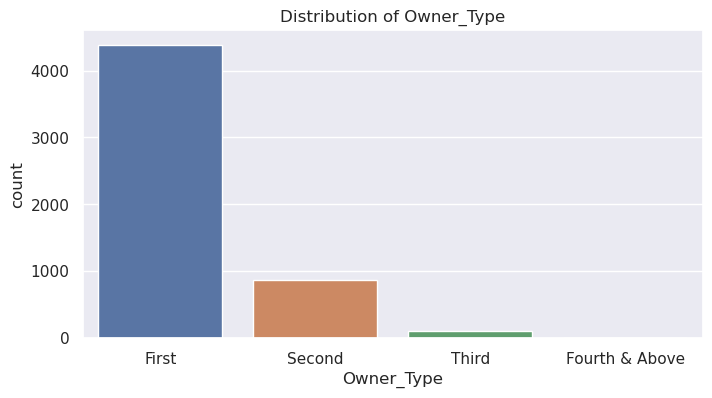

In [26]:
plt.figure(figsize=(8,4))
sns.countplot(df,x='Owner_Type');
plt.title('Distribution of Owner_Type');

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Owner_type is ordinal categorical feature that needs to be Encoded.
</p>
</div>

In [27]:
df['Owner_Type'] = df['Owner_Type'].map({"First":3,"Second":2,"Third":1,"Fourth & Above":0})

<h3>6. Mileage

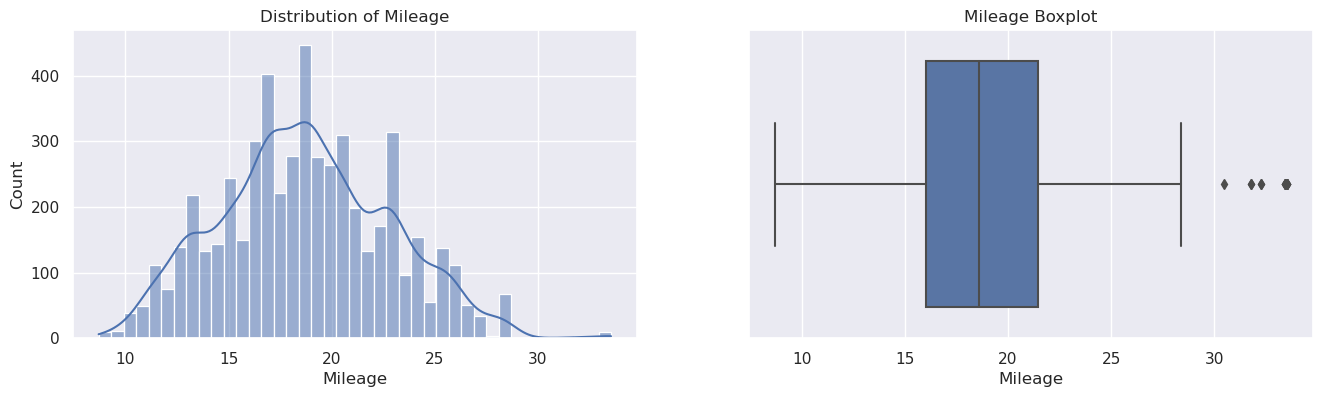

In [28]:
plot_num(df,'Mileage')

<h3>7. Engine

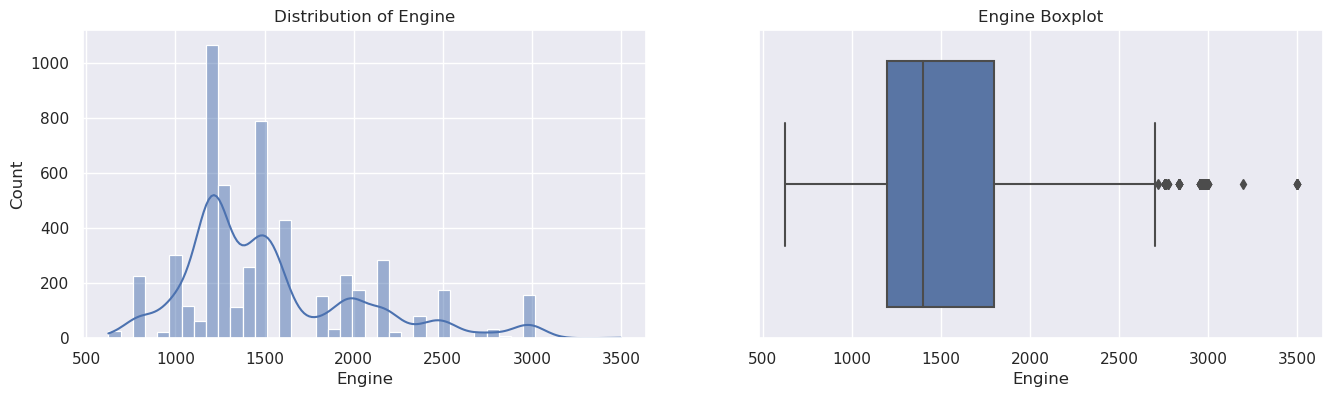

In [29]:
plot_num(df,'Engine')

<h3>8. Power

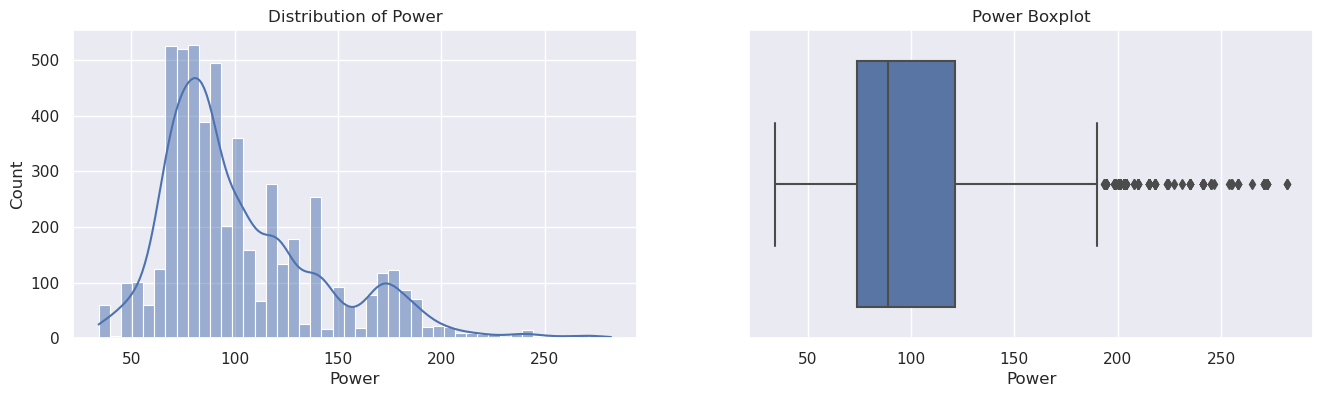

In [30]:
plot_num(df,'Power')

<h3>9. Seats

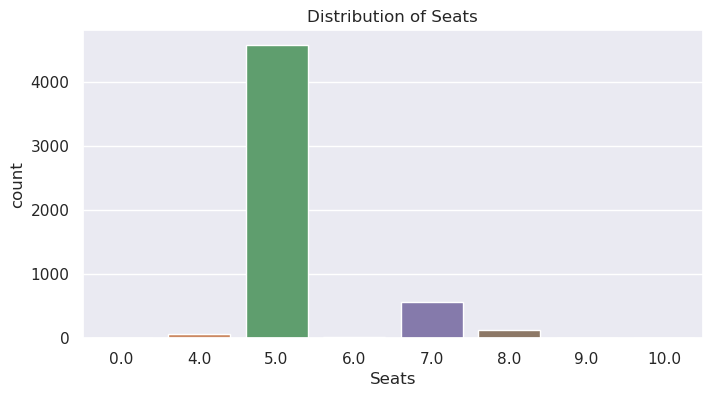

In [31]:
plt.figure(figsize=(8,4))
sns.countplot(df,x='Seats');
plt.title('Distribution of Seats');

In [32]:
df['Seats'].value_counts()

5.0     4582
7.0      560
8.0      122
4.0       62
6.0       26
10.0       4
9.0        3
0.0        1
Name: Seats, dtype: int64

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
To prevent modeling issues, it may be advisable to exclude Seats with low frequency from the dataset.
    </p>
</div>

In [33]:
df = df[df.Seats.between(5,8)]

<h3>10. Company

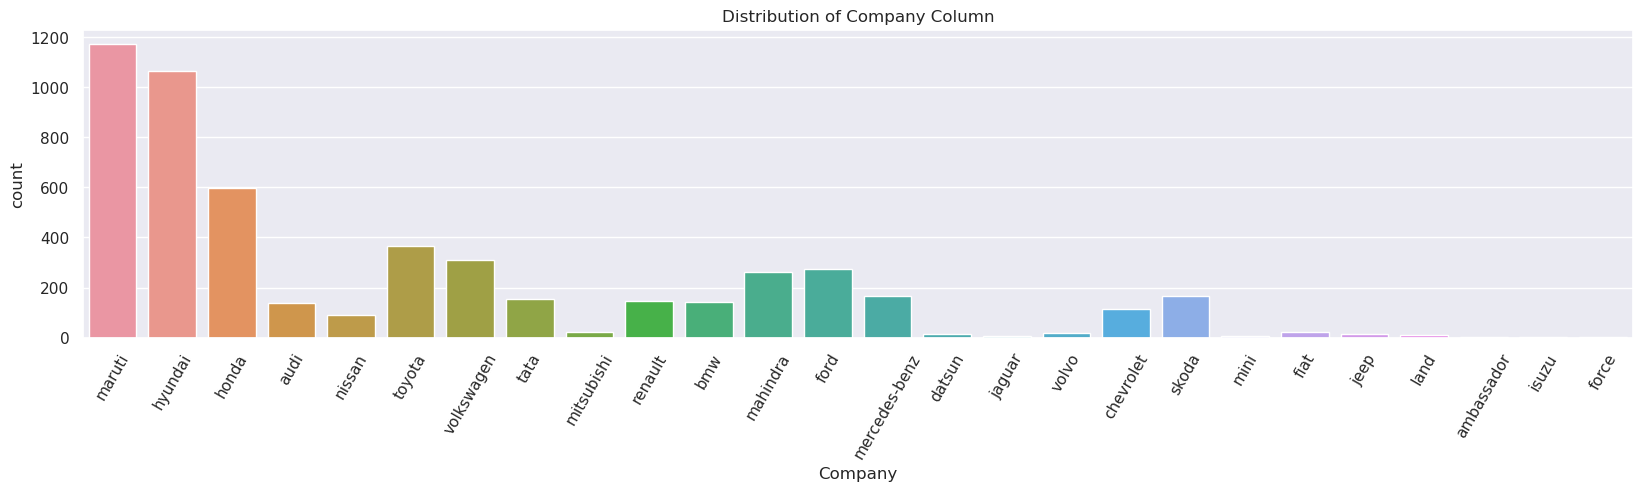

In [34]:
plt.figure(figsize=(20,4))
sns.countplot(df,x='Company');
plt.xticks(rotation=60)
plt.title('Distribution of Company Column');

<h3>11. Model

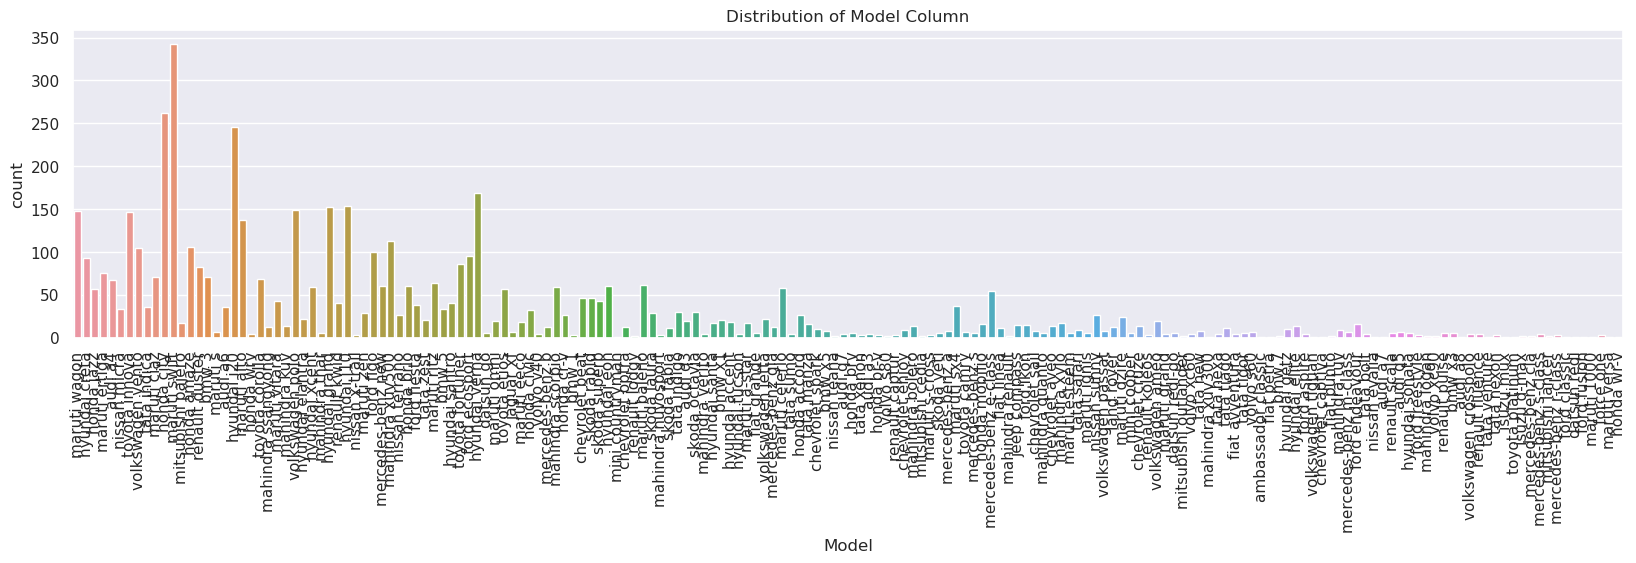

In [35]:
plt.figure(figsize=(20,4))
sns.countplot(df,x='Model',orient='h');
plt.xticks(rotation=90)
plt.title('Distribution of Model Column');

In [36]:
df.Model.value_counts()

maruti swift          342
honda city            262
hyundai i20           246
hyundai verna         169
hyundai i10           154
                     ... 
audi a7                 1
nissan evalia           1
ambassador classic      1
fiat petra              1
honda wr-v              1
Name: Model, Length: 178, dtype: int64

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
To prevent modeling issues, it may be advisable to exclude car models with low frequency from the dataset.    </p>
</div>

In [37]:
threshold = 10
counts = df.Model.value_counts()
to_drop = counts[counts<threshold].index.tolist()
df = df[~df['Model'].isin(to_drop)]

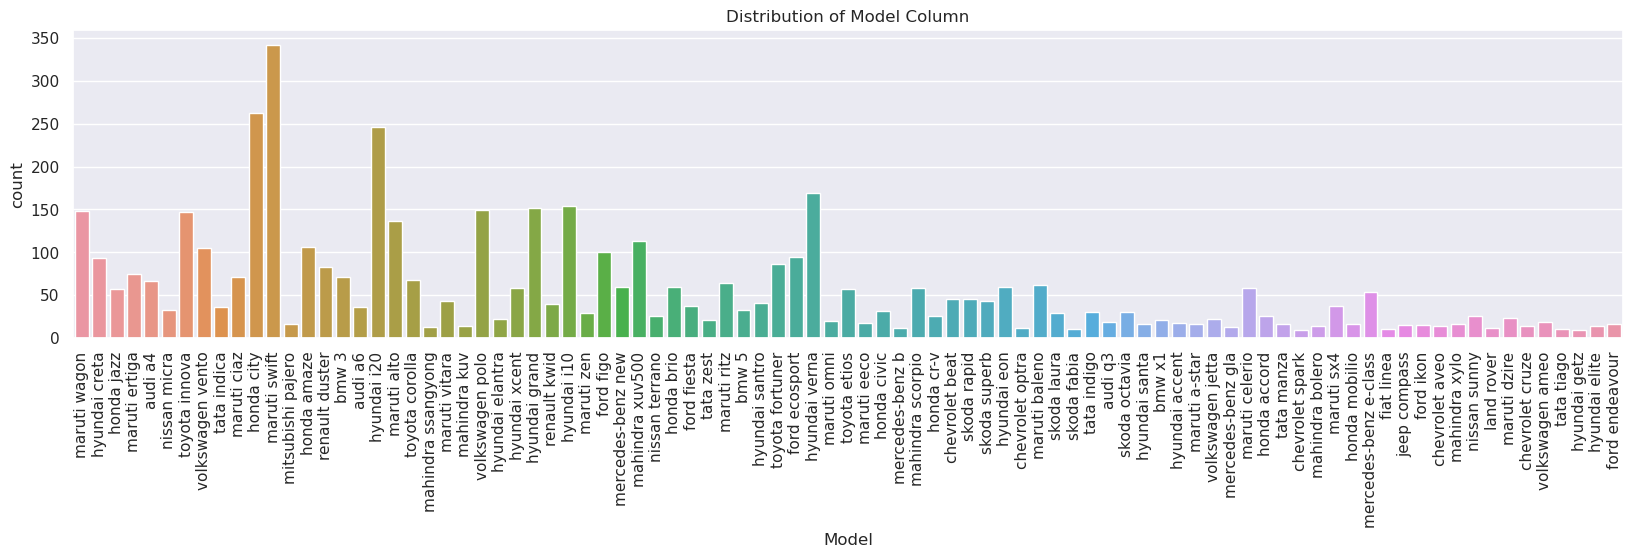

In [38]:
plt.figure(figsize=(20,4))
sns.countplot(df,x='Model',orient='h');
plt.xticks(rotation=90)
plt.title('Distribution of Model Column');

<h3>12. Location

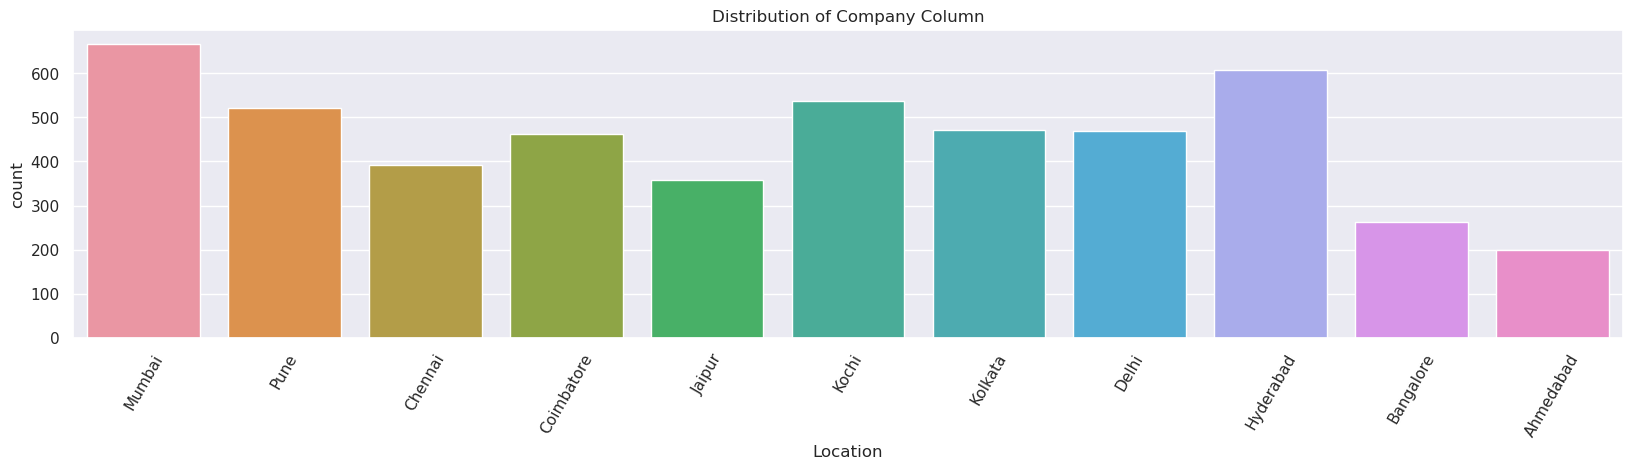

In [39]:
plt.figure(figsize=(20,4))
sns.countplot(df,x='Location');
plt.xticks(rotation=60)
plt.title('Distribution of Company Column');

<h3>13. Price

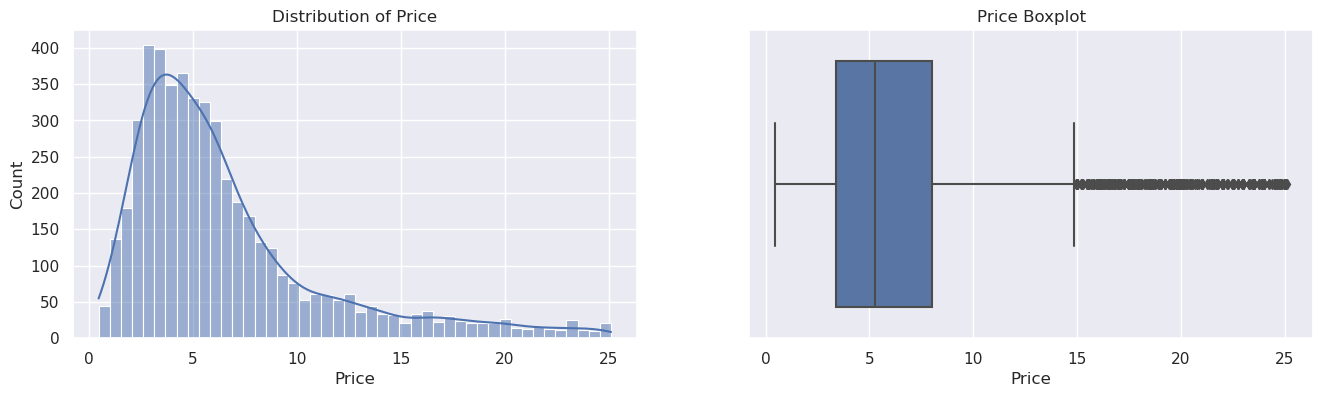

In [40]:
plot_num(df,'Price')

# Bivariate Analysis

In [41]:
agg = df.groupby('Year')['Price'].mean().sort_values(ascending=False)
fig = px.bar(agg , color = agg.index , width=700 , height =500,title='Year vs Mean Price')
fig.show()

In [42]:
fig = px.scatter(df,x='Kilometers_Driven',y='Price' , width=700 , height =500,title='Kilometers Driven vs Mean Price')
fig.show()

In [43]:
agg = df.groupby('Fuel_Type')['Price'].mean().sort_values(ascending = False)
fig = px.bar(agg , color = agg.index , width=700 , height =500,title='Fuel Type vs Mean Price')
fig.show()

In [44]:
agg = df.groupby('Transmission')['Price'].mean().sort_values(ascending=False)
fig = px.bar(agg , color = agg.index , width=700 , height =500,title='Transmission Type vs Mean Price')
fig.show()

In [45]:
agg = df.groupby('Owner_Type')['Price'].mean().sort_values(ascending=False)
fig = px.bar(agg , color = agg.index , width=700 , height =500,title='Owner Type vs Mean Price')
fig.show()

In [46]:
fig = px.scatter(df,x='Mileage',y='Price' , width=700 , height =500,title='Mileage vs Mean Price')
fig.show()

In [47]:
fig = px.scatter(df,x='Engine',y='Price' , width=700 , height =500,title='Engine vs Mean Price')
fig.show()

In [48]:
fig = px.scatter(df,x='Power',y='Price' , width=700 , height =500,title='Power vs Mean Price')
fig.show()

In [49]:
agg = df.groupby('Seats')['Price'].mean().sort_values(ascending=False)
fig = px.bar(agg , color = agg.index , width=700 , height =500,title='Seats vs Mean Price')
fig.show()

In [50]:
agg = df.groupby('Company')['Price'].mean().sort_values(ascending=False)
fig = px.bar(agg , color = agg.index , width=900 , height =700,title='Company vs Mean Price')
fig.show()

In [51]:
agg = df.groupby('Location')['Price'].mean().sort_values(ascending=False)
fig = px.bar(agg , color = agg.index , width=900 , height =700,title='Location vs Mean Price')
fig.show()

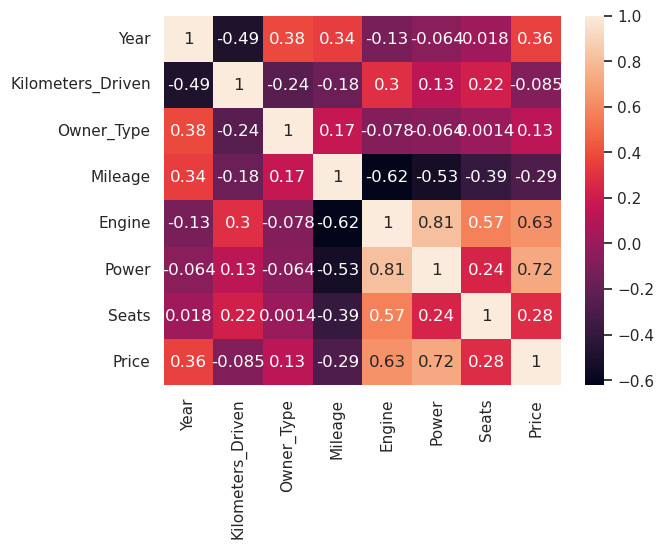

In [52]:
sns.heatmap(df.corr(),annot=True);

# Building Model

In [53]:
from sklearn.model_selection import train_test_split,GridSearchCV ,cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression,Ridge ,Lasso 
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler , OneHotEncoder,PolynomialFeatures 
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

# Data Splitting 

In [54]:
features = df.columns.drop(['Price'])
target = ['Price']

X = df[features]
y = df[target]

num_features = X.select_dtypes('number').columns
cat_features = X.select_dtypes('object').columns

In [55]:
X_train , X_test , y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Data Preprocessing

In [56]:
#numerical pipeline
num_pipeline = make_pipeline(
                SimpleImputer(),
                StandardScaler(),
                PolynomialFeatures(degree=2)
)
#categorical pipeline
cat_pipeline = make_pipeline(
                SimpleImputer(strategy='most_frequent'),
                OneHotEncoder()
                
)
#full pipeline
preprocessor = make_column_transformer(
                (num_pipeline,num_features),
                (cat_pipeline,cat_features)
)

# Modeling

<h2>LinearRegression

In [57]:
#Model Building
lin_reg = make_pipeline(
            preprocessor,
            LinearRegression()
    )

In [58]:
#hyperparameter tunning
param_grid = {'columntransformer__pipeline-1__polynomialfeatures__degree':[2,3,4,5,6]}
Grid_search = GridSearchCV(    lin_reg, 
                               param_grid = param_grid,
                               cv = 5,
                               scoring='r2')
Grid_search.fit(X_train,y_train)
Grid_search.best_params_

{'columntransformer__pipeline-1__polynomialfeatures__degree': 2}

In [59]:
#Model Training
lin_reg.fit(X_train,y_train);

#measuring accuracy
pred_train = lin_reg.predict(X_train)
print("Training set Accuracy:",round(r2_score(pred_train,y_train),4)*100)
print("Testing set Accuracy:",round(lin_reg.score(X_test,y_test),4)*100)

#Cross validation
scores = cross_val_score(lin_reg,X,y,cv=5)
print("CV Scores Mean",round(scores.mean(),4)*100 )
print("CV Scores standard deviation",scores.std() )

Training set Accuracy: 93.61
Testing set Accuracy: 94.31
CV Scores Mean 93.52000000000001
CV Scores standard deviation 0.005251111022974693


<h2>Ridge

In [60]:
#Model Building
ridge = make_pipeline(
            preprocessor,
            Ridge(alpha=0.01)
    )

In [61]:
#hyperparameter tunning
param_grid = {'ridge__alpha':[0.01,0.1,1,10,100],
             'columntransformer__pipeline-1__polynomialfeatures__degree':[2,3,4,5,6]}
Grid_search = GridSearchCV(    ridge, 
                               param_grid = param_grid,
                               cv = 5,
                               scoring='r2')
Grid_search.fit(X_train,y_train)
Grid_search.best_params_

{'columntransformer__pipeline-1__polynomialfeatures__degree': 2,
 'ridge__alpha': 0.01}

In [62]:
#Model Training
ridge.fit(X_train,y_train);

#measuring accuracy
pred_train = ridge.predict(X_train)
print("Training set Accuracy:",round(r2_score(pred_train,y_train),4)*100)
print("Testing set Accuracy:",round(ridge.score(X_test,y_test),4)*100)

#Cross validation
scores = cross_val_score(ridge,X,y,cv=5)
print("CV Scores Mean",round(scores.mean(),4)*100 )
print("CV Scores standard deviation",scores.std() )

Training set Accuracy: 93.53
Testing set Accuracy: 94.3
CV Scores Mean 93.41000000000001
CV Scores standard deviation 0.0056714525651827856


<h2> Lasso

In [63]:
#Model Building
lasso = make_pipeline(
        preprocessor,
        Lasso(alpha=0.001)
)

In [64]:
#Hyperparameter Tunning
param_grid={
    "lasso__alpha":[0.001,0.01,0.1,1,10,100],
    "columntransformer__pipeline-1__polynomialfeatures__degree":[2,3,4,5]}
grid_search = GridSearchCV(
            lasso,
            param_grid=param_grid,
            scoring='r2',
            cv=5
)
grid_search.fit(X_train,y_train);
grid_search.best_params_

{'columntransformer__pipeline-1__polynomialfeatures__degree': 2,
 'lasso__alpha': 0.001}

In [65]:
#Model Training
lasso.fit(X_train,y_train);

#measuring accuracy
pred_train = lasso.predict(X_train)
print("Training set Accuracy:",round(r2_score(pred_train,y_train),4)*100)
print("Testing set Accuracy:",round(lasso.score(X_test,y_test),4)*100)

#Cross validation
scores = cross_val_score(lasso,X,y,cv=5)
print("CV Scores Mean",round(scores.mean(),4)*100 )
print("CV Scores standard deviation",scores.std() )

Training set Accuracy: 93.22
Testing set Accuracy: 94.13
CV Scores Mean 93.27
CV Scores standard deviation 0.006508436900405817


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
We find that LinearRegression performs better on both train and test sets.
</p>
</div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#B59410;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
If you found my work helpful, I would greatly appreciate it if you could kindly Upvote.
</p>
</div>